In [1]:
!kinit -kt $KRB5_CLIENT_KTNAME $KRB5_PRINCIPAL

In [1]:
import math
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyarrow as pa
import pyarrow.parquet as pq

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [6]:
fs = pa.hdfs.connect()
read_parquet = lambda path: pq.ParquetDataset(path, fs).read().to_pandas()

<ipython-input-6-8b50fffffb0d>:1: DeprecationWarning: pyarrow.hdfs.connect is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  fs = pa.hdfs.connect()


In [7]:
def plot_feature_vs_target(df, feature, target):
    plt.scatter(df[feature], df[target])
#     plt.xlim(-0.02, 0.5)
#     plt.ylim(-0.02, 0.5)
    plt.show()

### Baseline

In [15]:
baseline_df = read_parquet("/data/Archive/plp/bhavesh/files/prod_run_2023-03-23/segment/standardizedTrain/yDataRevenuePerView/clusterid=cluster1")
baseline_df.describe().to_csv("baseline_feature.csv")

In [16]:
baseline_target = baseline_df["yDataRevenuePerView"].values
baseline_target.shape

(1337312,)

In [6]:
q1, q3 = np.quantile(baseline_target, 0.25), np.quantile(baseline_target, 0.75)
iqr = q3-q1
lb, ub = q1-1.5*iqr, q3+1.5*iqr
q1, q3, iqr, lb, ub

(0.0, 0.0, 0.0, 0.0, 0.0)

In [7]:
pd.Series(baseline_target[baseline_target>0.0]).describe()

count    35738.000000
mean         0.002092
std          0.007158
min          0.000008
25%          0.000620
50%          0.001104
75%          0.002099
max          1.000000
dtype: float64

In [12]:
pd.Series(baseline_target).describe()

count    1.337312e+06
mean     5.589530e-05
std      1.217855e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64

In [34]:
baseline_df[baseline_df["yDataRevenuePerView"]>0.0].describe().to_csv("baseline_feature.csv")

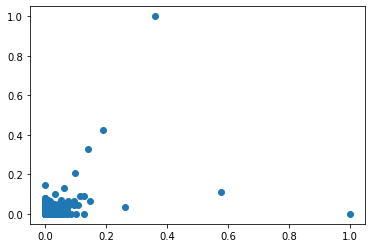

In [11]:
plot_feature_vs_target(baseline_df, feature="1RevenuePerView", target="yDataRevenuePerView")

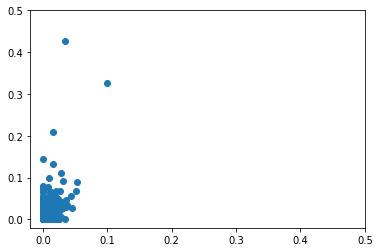

In [32]:
plot_feature_vs_target(baseline_df, feature="2RevenuePerView", target="yDataRevenuePerView")

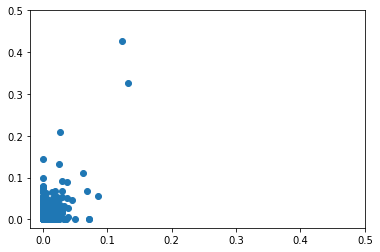

In [33]:
plot_feature_vs_target(baseline_df, feature="3RevenuePerView", target="yDataRevenuePerView")

### Anomaly

In [18]:
df = read_parquet("/data/Archive/plp/bhavesh/experiments/ajioplp_2023-03-21_prod/segment/train/yDataRevenuePerView/clusterid=cluster1")
df.describe().to_csv("feature.csv")

In [19]:
target = df["yDataRevenuePerView"].values
target.shape

(1346240,)

In [20]:
q1, q3 = np.quantile(target, 0.25), np.quantile(target, 0.75)
iqr = q3-q1
lb, ub = q1-1.5*iqr, q3+1.5*iqr
q1, q3, iqr, lb, ub

(0.0, 0.0, 0.0, 0.0, 0.0)

In [21]:
pd.Series(target[target>0.0]).describe()

count    37822.000000
mean         0.016908
std          0.041794
min          0.000027
25%          0.005023
50%          0.008900
75%          0.017032
max          4.154712
dtype: float64

In [35]:
df[df["yDataRevenuePerView"]>0.0].describe().to_csv("feature.csv")

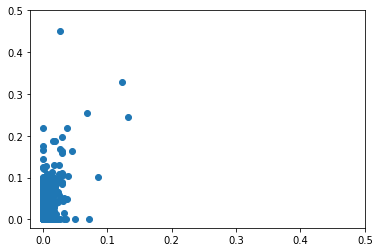

In [29]:
plot_feature_vs_target(df, feature="1RevenuePerView", target="yDataRevenuePerView")

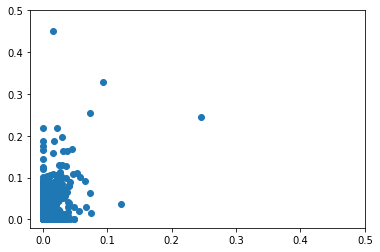

In [30]:
plot_feature_vs_target(df, feature="2RevenuePerView", target="yDataRevenuePerView")

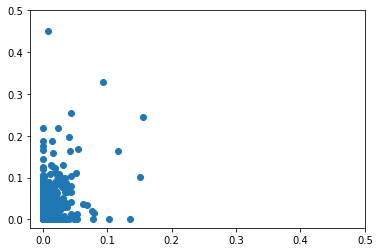

In [31]:
plot_feature_vs_target(df, feature="3RevenuePerView", target="yDataRevenuePerView")

### comparison

<AxesSubplot:>

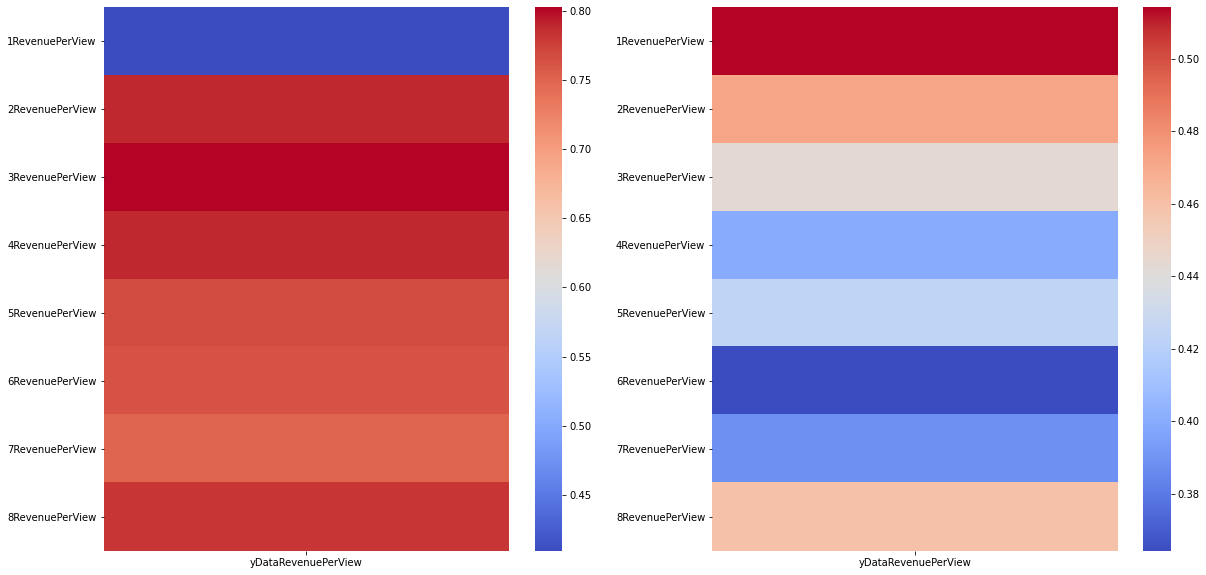

In [26]:
start = 5
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.heatmap(baseline_df.corr().iloc[-1:, start:-1:6].T, cmap='coolwarm', ax=ax[0])
sns.heatmap(df.corr().iloc[-1:, start:-1:6].T, cmap='coolwarm', ax=ax[1])